In [8]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

In [9]:
(mg_m14_20220309_lidar,z_m14_20220309_lidar) = read_esri_ascii("m14/wsyr2/m14_20220309_lidar.asc", \
    name='topographic__elevation')

(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')

In [10]:
mg_m14_20220309_lidar.set_watershed_boundary_condition(z_m14_20220309_lidar)
mg_m14_20220309_sfm.set_watershed_boundary_condition(z_m14_20220309_sfm)
mg_m14_20220316_sfm.set_watershed_boundary_condition(z_m14_20220316_sfm)
mg_m14_20220324_sfm.set_watershed_boundary_condition(z_m14_20220324_sfm)
mg_m14_20220411_sfm.set_watershed_boundary_condition(z_m14_20220411_sfm)
mg_m14_20220428_sfm.set_watershed_boundary_condition(z_m14_20220428_sfm)
mg_m14_20220601_sfm.set_watershed_boundary_condition(z_m14_20220601_sfm)

In [11]:
fa_m14_20220309_lidar = FlowAccumulator(mg_m14_20220309_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [12]:
(da_m14_20220309_lidar, discharge_m14_20220309_lidar) = fa_m14_20220309_lidar.accumulate_flow()
(da_m14_20220309_sfm, discharge_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, discharge_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, discharge_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, discharge_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, discharge_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, discharge_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

In [13]:
S_m14_20220309_lidar = mg_m14_20220309_lidar.calc_slope_at_node(z_m14_20220309_lidar)   # let's call this a slope field and add it to the grid
_=mg_m14_20220309_lidar.add_field('node','Slope',S_m14_20220309_lidar, clobber=True)  

S_m14_20220309_sfm = mg_m14_20220309_sfm.calc_slope_at_node(z_m14_20220309_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220309_sfm.add_field('node','Slope',S_m14_20220309_sfm, clobber=True)  

S_m14_20220316_sfm = mg_m14_20220316_sfm.calc_slope_at_node(z_m14_20220316_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220316_sfm.add_field('node','Slope',S_m14_20220316_sfm, clobber=True)  

S_m14_20220324_sfm = mg_m14_20220324_sfm.calc_slope_at_node(z_m14_20220324_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220324_sfm.add_field('node','Slope',S_m14_20220324_sfm, clobber=True)  

S_m14_20220411_sfm = mg_m14_20220411_sfm.calc_slope_at_node(z_m14_20220411_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220411_sfm.add_field('node','Slope',S_m14_20220411_sfm, clobber=True)  

S_m14_20220428_sfm = mg_m14_20220428_sfm.calc_slope_at_node(z_m14_20220428_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220428_sfm.add_field('node','Slope',S_m14_20220428_sfm, clobber=True)  

S_m14_20220601_sfm = mg_m14_20220601_sfm.calc_slope_at_node(z_m14_20220601_sfm)   # let's call this a slope field and add it to the grid
_=mg_m14_20220601_sfm.add_field('node','Slope',S_m14_20220601_sfm, clobber=True)  

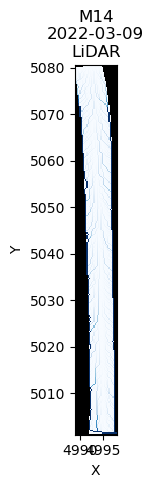

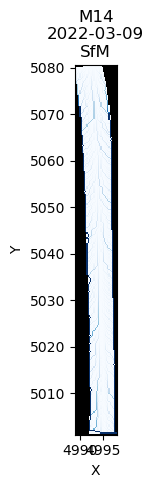

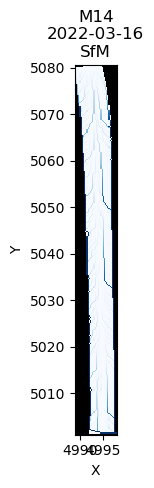

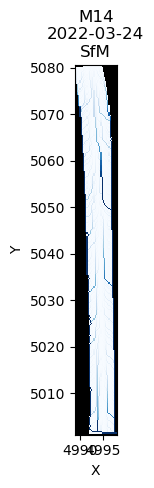

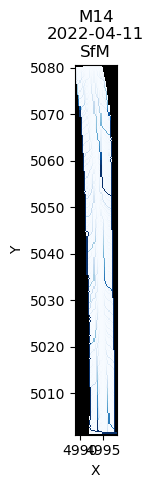

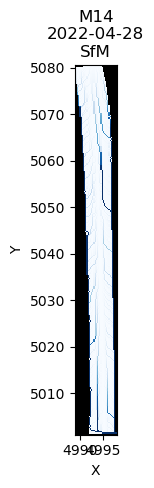

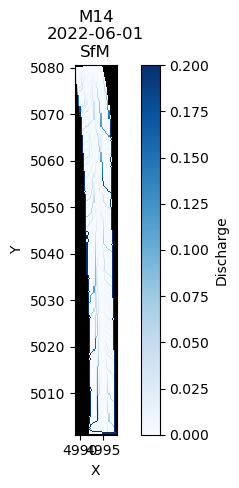

In [14]:
imshow_grid(mg_m14_20220309_lidar,'surface_water__discharge', plot_name = 'M14\n2022-03-09\nLiDAR', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220309_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-09\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220316_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-16\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220324_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-24\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220411_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-11\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220428_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-28\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

imshow_grid(mg_m14_20220601_sfm,'surface_water__discharge', plot_name = 'M14\n2022-06-01\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
plt.show();

In [ ]:
mg.at_node.keys()

In [ ]:
imshow_grid(mg,'topographic__elevation',plot_name='Elevation')